# Logistic Regression

In this lab, you need to implement a logistic regression algorithm and test your model on a subset of the iris dataset.

### Part 1: Logistic regression algorithm

The hypothsis function of logistic regression is:
$$f(\mathbf{x})=g(\sum_{j=0}^{d}\beta_j x_j),$$
where $x_j(j>0)$ is the $j$-th dimension of input $\mathbf{x}$, $\beta_j$ is the weight of $x_j$, $x_0=1$, $\beta_0$ is the intercept value, and $g(x)=\frac{1}{1+e^{-x}}$ is the sigmoid function. The hypothsis function can also be written as:
$$f(\mathbf{x})=g(\mathbf{\beta}^T \mathbf{x}).$$
Remind that the first element in $\mathbf{x}$ is 1 and the first element in $\mathbf{\beta}$ is the intercept value.

<hr>
  
Given a train dataset $\mathbb{D}_{train}=\{(\mathbf{x}_i, y_i)|i \in [1,n], \mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0,1\}\}$. The cross-entropy loss function is:
$$Loss=\frac{1}{n}\sum_{i=1}^{n}-y_ilog(f(\mathbf{x}_i))-(1-y_i)log(1-f(\mathbf{x}_i)).$$
  
Linear regression aims to minimize the loss function. The optimization process can be conducted by gradient descent algorithm. Given the learning rate $\alpha$ and the number of iterations $n_{iters}$:
1. Initialize the vector of $\beta$ with $0$s.
2. for _ in range($n_{iters}$):
$$\beta=\beta-\alpha*\frac{\partial Loss}{\partial \beta},$$
where $\frac{\partial Loss}{\partial \beta}=\frac{\partial Loss}{\partial f}*\frac{\partial f}{\partial \mathbf{\beta}^T \mathbf{x}}*\frac{\partial \mathbf{\beta}^T \mathbf{x}}{\partial \mathbf{\beta}}=\frac{1}{n}\sum_{i=1}^{n}(-\frac{y_i}{f(\mathbf{x}_i)}+\frac{1-y_i}{1-f(\mathbf{x}_i)})*(f(\mathbf{x}_i)(1-f(\mathbf{x}_i)))*\mathbf{x}_i$(The deviation of matrix: <https://en.wikipedia.org/wiki/Matrix_calculus>)

After training the model on the train dataset, we can then use this model to predict the labels for instances in the test dataset:
$$\hat{y}=\left\{
\begin{aligned}
1, f(\mathbf{x})\geq\frac{1}{2}\\
0, f(\mathbf{x})<\frac{1}{2}
\end{aligned}
\right.$$

<hr>

**Tasks**

* In this part, you need to implement the class `MyLogisticRegression` with 5 methods -- `__init__`, `fx`, `loss`, `fit`, and `predict` to perform above tasks.

In [29]:
import numpy as np

class MyLogisticRegression:
    def __init__(self):
        """
        Class contructor.
        
        :attr beta: weights vector of logistic regression.
        """
        self.beta = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fx(self, X):
        """
        Calculate the value of f(x) given x.

        :param X: numpy.ndarray with a shape of (n, d), input data.
        :return:
            fx_value: numpy.ndarray with a length of n, output of f(x).
        """
        # TODO 1: complete the calculation process of f(x)
        # betaT = np.reshape(self.beta, (-1, 1))
        # print(betaT)
        # fx_value = betaT @ X

        fx_value = X @ self.beta

        fx_value = self.sigmoid(fx_value)
        
        return fx_value

    def loss(self, fx_value, y):
        """
        Calculate the loss function given the calculated value f(x) and the true label y.

        :param fx_value: numpy.ndarray with a length of n, 
                         a vector of hypothesis function values on these samples, which is the output of the function fx
        :param y: numpy.ndarray with a length of n, 
                  a vector of the true labels of these samples
        :return:
            CELoss: a float value of the cross-entropy loss.
        """
        # TODO 2: complete the loss function calculation
        loss = -y*np.log(fx_value) - (1 - y) * np.log(1 - fx_value)
        loss = np.sum(loss) / len(fx_value)
        return loss

    def fit(self, X, y, n_iters = 100, alpha = 0.01):
        """
        Train the model using gradient descent

        :param X: numpy.ndarray with a shape of (n*d), input data.
        :param y: numpy.ndarray with a length of n, the true labels of these samples
        :param n_iters: int, number of iterations
        :param alpha: float, learning rate
        :return:
            CELoss_list: list with a length of n_iters+1, 
                         contains the loss values before the gradient descent and after the gradient descent.
        """

        n, d = X.shape
        
        self.beta = np.zeros(d+1)
        #the first element in X_ is 1
        X_ = np.column_stack([np.ones(n), X])
        fx_value = self.fx(X_)
        CELoss_list = [self.loss(self.fx(X_), y)]
        
        for i in range(n_iters):
            # TODO 3: update self.beta
            self.beta = self.beta - alpha * self.cal_deviation(fx_value, X_, y)
            CELoss_list.append(self.loss(self.fx(X_), y))
        
        return CELoss_list

    def cal_deviation(self, fx_value, x, y):
        A = np.zeros((x.shape))
        dev = (-(y/fx_value) + (1-y)/(1-fx_value)) * (fx_value*(1-fx_value))
        for i in range(len(dev)):
            A[i] = dev[i] * x[i]
        A = np.sum(A, axis=0)
        return A / len(fx_value)

    def predict(self, X):
        """
        Predict the labels of input instances.

        :param X: numpy.ndarray with a shape of (n*d), input data.
        :return:
            y_hat: numpy.ndarray with a length of n, the predicted labels of these samples
        """
        # TODO 4: predict the labels of the input data X and return the labels y_hat.
        X_ = np.column_stack([np.ones(len(X)), X])
        fx_value = self.fx(X_)
        y_hat = np.zeros((fx_value.shape))
        for i in range(len(y_hat)):
            y_hat[i] = 1 if fx_value[i] >= 0.5 else 0 
        
        return y_hat

### Part 2: Load dataset
Here, we will use a popular machine learning dataset `Iris plants dataset`. Details of iris dataset can be found in <https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset>. For simplicity, we use the third and fourth attributes `petal length` and `petal width` to predict whether a iris plant is a `Iris-Setosa (class 0)` or a `Iris-Versicolor (class 1)`.
![iris setosa](./setosa.png)
![iris versicolor](./versicolor.png)

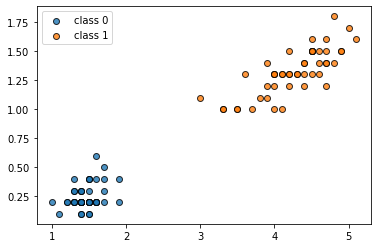

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# load data
iris = datasets.load_iris() 
X = iris.data[:, [2, 3]] 
y = iris.target
y_mask = (y == 0) | (y == 1)
X = X[y_mask]
y = y[y_mask]

# plot the data
for idx, class_ in enumerate(np.unique(y)):       
    plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1],                   
                alpha=0.8, label="class {}".format(class_),                     
                edgecolor='black')
plt.legend()
plt.show()

### Part 3: Train dataset using your model
In this part, you will use your logistic regression model to train a model and test whether it is good enough to handle the classification task of the iris dataset. Before all of these, we need to prepare the dataset first:
* split the dataset into train and test part
* standardize the data using the train dataset

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y) 

# standarize varibles by removing the mean and scaling to unit variance
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)

Train your model on the train dataset

In [32]:
# initialize and train the model
my_model = MyLogisticRegression()
losses = my_model.fit(X_train_std, y_train)
for i, loss in enumerate(losses):
    if i%10 ==0:
        print("Step {}: Cross-Entropy Loss: {}".format(i, loss)) 

Step 0: Cross-Entropy Loss: 0.6931471805599454
Step 10: Cross-Entropy Loss: 0.6475820458284249
Step 20: Cross-Entropy Loss: 0.6043189148093142
Step 30: Cross-Entropy Loss: 0.5633386641684461
Step 40: Cross-Entropy Loss: 0.5246099677948605
Step 50: Cross-Entropy Loss: 0.488090080357744
Step 60: Cross-Entropy Loss: 0.4537258673789902
Step 70: Cross-Entropy Loss: 0.42145502414047176
Step 80: Cross-Entropy Loss: 0.39120742051099366
Step 90: Cross-Entropy Loss: 0.3629065091665853
Step 100: Cross-Entropy Loss: 0.3364707397350015


Test your model on the test dataset

In [33]:
from sklearn.metrics import accuracy_score

y_pred = my_model.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print("The accuracy of your model is {}".format(acc))

The accuracy of your model is 1.0


Plot the decision boundary on the whole dataset

/tmp/ipykernel_4476/620012955.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1],


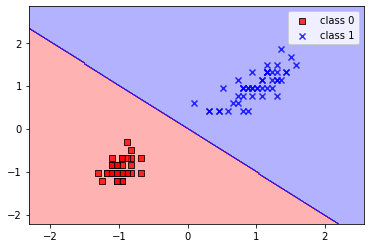

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

def plot_decision_regions(X, y, classifier,                            
                          resolution=0.02):
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),                           
                           np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())
    for idx, class_ in enumerate(np.unique(y)):       
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1],                   
                    alpha=0.8, c=colors[idx],                    
                    marker=markers[idx], label="class {}".format(class_),                     
                    edgecolor='black')
        
        plt.legend()
        
# remind that we still need to transform the whole dataset first
X_std = sc.transform(X)
plot_decision_regions(X_std, y, classifier=my_model)

### Part 4: Using regression logistic model in sklearn module
`sklearn` (short for scikit-learn) is a module basing on `numpy` and `scipy`.
This project is initialized by `David Cournapeau` in 2007.
After years development by the community, it is already one of the most powerful package in Python.

Basically, this package contains all the well-used tools in a complete data mining or machine learning process.

Link to the project: [Github/scikit-learn](https://github.com/scikit-learn/scikit-learn)


As the picture shows, this package contains all the well-used tools in a complete data mining or machine learning process.

![](ml_map.png)

/tmp/ipykernel_4476/620012955.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1],


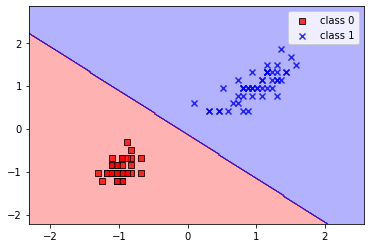

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_std = sc.transform(X)
plot_decision_regions(X_std, y, classifier=lr)